<h1 style='color: red; font-size: 28px; font-weight: bold;'>Análises Descritivas e Regressão Linear - Incidentes de Segurança da Informação no Brasil</h1>

# <font color='blue' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid blue;'>

## Dados a serem analisados:
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Com o passar do tempo e a difusão das tecnologias, os Incidentes de Segurança da Informação vão crescendo cada vez mais, pois criminosos vão se aproveitando de vulnerabilidades nos sistemas que permitem a ocorrência de ataques. O tratamento de ameaças e incidentes de Segurança da Informação é fundamental para evitar ataques e vazamentos que possam resultar na perda, danos ou acesso não autorizados às informações e dados, assim como mitigar os impactos causados pelo incidente.Todos os processos envolvidos na gestão de incidentes, desde a detecção até a resposta, asseguram a documentação e existência de logs adequados que permitem melhores evidências forenses e conteúdo para auditoria.
 </p> 

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Tendo isso em vista, iremos realizar análises descritivas do dataset e montar um modelo de previsões baseados na técnica de Machine Learning Regressão Linear. O conjunto de dados utilizado para a análise adveio do CERT.br (Centro de Estudos, Resposta e Tratamento de Incidentes de Segurança no Brasil), e trata-se do número de ocorrências de Incidentes de Segurança da Informação no Brasil, de 2010 a 2019. O objetivo principal é identificar quais são as variáveis que mais impactam no número total de casos de Incidentes de Segurança da Informação. </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> </p>

   ### link da fonte: https://www.cert.br/stats/incidentes/
   


### Variáveis:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Ano</b>
    <li><b>Mes</b>
    <li><b>Total</b> - Número total de incidentes reportados.</li>
    <li><b>Worn</b>- Número total de incidentes Worm reportados. São notificações de atividades maliciosas relacionadas com o processo automatizado de propagação de códigos maliciosos na rede.</li>
    <li><b>DOS</b> - Número total de incidentes de Denial of Service reportados. Diz respeito a notificações de ataques de negação de serviço, onde o atacante utiliza um computador ou um conjunto de computadores para tirar de operação um serviço, computador ou rede.</li>
    <li><b>Invasão</b> - Número total de incidentes de invasão reportados. É caracterizado por um ataque bem sucedido que resulte no acesso não autorizado a um computador ou rede.</li>
    <li><b>Web</b> - Número toral de incidentes de Web reportados. Um caso particular de ataque visando especificamente o comprometimento de servidores Web ou desfigurações de páginas na Internet.</li>
    <li><b>Scan</b> - Número total de incidentes Scan reportados. Notificações de varreduras em redes de computadores, com o intuito de identificar quais computadores estão ativos e quais serviços estão sendo disponibilizados por eles. É amplamente utilizado por atacantes para identificar potenciais alvos, pois permite associar possíveis vulnerabilidades aos serviços habilitados em um computador.
</li>
    <li><b>Fraude</b> - Número total de incidentes de Fraude reportados. Segundo Houaiss, é "qualquer ato ardiloso, enganoso, de má-fé, com intuito de lesar ou ludibriar outrem, ou de não cumprir determinado dever; logro". Esta categoria engloba as notificações de tentativas de fraudes, ou seja, de incidentes em que ocorre uma tentativa de obter vantagem.
</li>
    <li><b>Outros</b> - Número total de outros incidentes reportados. Notificações de incidentes que não se enquadram nas categorias anteriores.</li>
</ul>

## <font color='blue' style='font-size: 30px;'>Análise</font>
<hr style='border: 2px solid blue;'>

## Importando as Bibliotecas e o DataSet:

In [1]:
import numpy as np # Pyhon Numérico
import pandas as pd # Processamento de dados, Arquivos CSV I/O (EX: pd.read_csv)
import random as rd # Geração de Números Aleatórios
import datetime # Manipulação de Formatação de Datas

# Visualização
%matplotlib inline
import matplotlib.pyplot as plt # Plotagem Básica
import seaborn as sns # Plotagem bonitinha
plt.rc('figure', figsize = (20,10))

# Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# Configurações
import warnings
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_csv('dataset/cert_2010-2019.csv', sep=';')

# Visualizando ...
dados.head(5)

,Ano,Mes,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
0,2019,Janeiro,62481,7796,4191,19,2594,46038,1744,99
1,2019,Fevereiro,70069,7707,2192,27,4179,54401,1459,104
2,2019,Março,85409,4476,29309,19,2006,47966,1521,112
3,2019,Abril,59900,7624,2718,37,1555,45774,2119,73
4,2019,Maio,52129,6555,15773,74,1425,25521,2633,148


## Análises Iniciais

In [3]:
# Resumo das estatísticas descritivas dos dados:

dados.loc[:][['Total', 'Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros']].describe().round(2)

,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
count,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00
mean,51360.64,3448.17,8261.99,265.68,2855.58,24064.99,9184.67,3279.56
std,38427.81,2357.21,27204.10,391.46,2396.05,13109.14,17528.36,6239.56
min,8223.00,865.00,0.00,1.00,402.00,2920.00,1459.00,30.00
25%,30145.50,1836.25,13.00,22.75,1329.75,13255.00,3294.25,240.75
50%,47623.00,2862.00,210.50,103.50,2001.50,23249.50,5324.00,1141.50
75%,58682.25,4146.50,5955.75,374.50,3534.25,32565.75,7815.75,3489.75
max,257618.00,12871.00,207780.00,2149.00,12169.00,60890.00,130108.00,32746.00


In [4]:
# 'Total' será nossa variável dependente:

dados.corr().round(2)

# DOS e Fraude e Scan aparentam, em um primeiro momento, ter forte correlação com o aumento do número de incidentes.

,Ano,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
Ano,1.00,0.41,0.54,0.26,-0.22,0.38,0.75,-0.02,-0.44
Total,0.41,1.00,0.22,0.82,-0.11,0.22,0.40,0.61,-0.13
Worm,0.54,0.22,1.00,0.13,-0.12,-0.12,0.39,-0.05,-0.27
DOS,0.26,0.82,0.13,1.00,-0.12,0.02,0.08,0.22,-0.13
Invasao,-0.22,-0.11,-0.12,-0.12,1.00,-0.12,-0.15,0.05,0.04
Web,0.38,0.22,-0.12,0.02,-0.12,1.00,0.45,0.07,-0.18
Scan,0.75,0.40,0.39,0.08,-0.15,0.45,1.00,0.02,-0.38
Fraude,-0.02,0.61,-0.05,0.22,0.05,0.07,0.02,1.00,-0.08
Outros,-0.44,-0.13,-0.27,-0.13,0.04,-0.18,-0.38,-0.08,1.00


In [5]:
# Agrupamento por ano:
anos = dados.groupby('Ano')

# Total de casos por categoria, por ano:
categoria_anos = anos[['Invasao','Web','Outros','Worm', 'DOS', 'Fraude', 'Scan', 'Total']].sum().round(2)
categoria_anos

,Invasao,Web,Outros,Worm,DOS,Fraude,Scan,Total
Ano,,,,,,,,
2010,89,8712,4440,17628,198,31008,80769,142844
2011,106,15491,196613,26897,272,40381,119755,399515
2012,7815,25557,91823,38466,309,69561,232498,466029
2013,11207,18721,42917,27979,1030,85675,165396,352925
2014,6509,28808,14308,42191,223935,467621,263659,1047031
2015,2457,65647,21021,47722,25360,168775,391223,722205
2016,1695,55441,14675,28248,60432,102718,383903,647112
2017,401,60766,4742,45101,220188,59319,443258,833775
2018,1075,41193,1494,39071,158407,37684,397590,676514


In [6]:
# Número Total de incidentes por ano:

casos_por_anos = anos['Total'].sum()
casos_por_anos = pd.DataFrame(casos_por_anos)
casos_por_anos.sort_values(by = 'Total')

,Total
Ano,
2010,142844
2013,352925
2011,399515
2012,466029
2016,647112
2018,676514
2015,722205
2017,833775
2019,875327


In [7]:
# total de casos por categoria:

total_categoria = dados.loc[:][['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros','Total']].sum()
total_categoria = pd.DataFrame(total_categoria, columns = ['TOTAL'])
total_categoria.columns.name = 'Categoria'
total_categoria.sort_values(by = 'TOTAL')

Categoria,TOTAL
Invasao,31881
Web,342670
Outros,393547
Worm,413780
DOS,991439
Fraude,1102161
Scan,2887799
Total,6163277


# Análises Gráficas

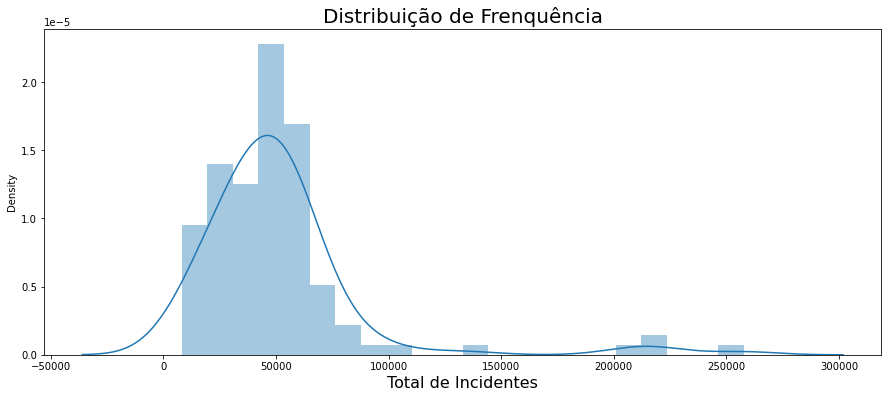

In [8]:
# Distribuição de Frenquência da Variável dependente 

plt.figure(figsize = (15,6))
sns.distplot(dados['Total'])
plt.title('Distribuição de Frenquência', fontsize=20)
plt.xlabel('Total de Incidentes', fontsize=16)
plt.show()

# O gráfico apresenta assimetria à esquerda

<AxesSubplot:title={'center':'Total de Incidentes'}, ylabel='Total de Incidentes'>

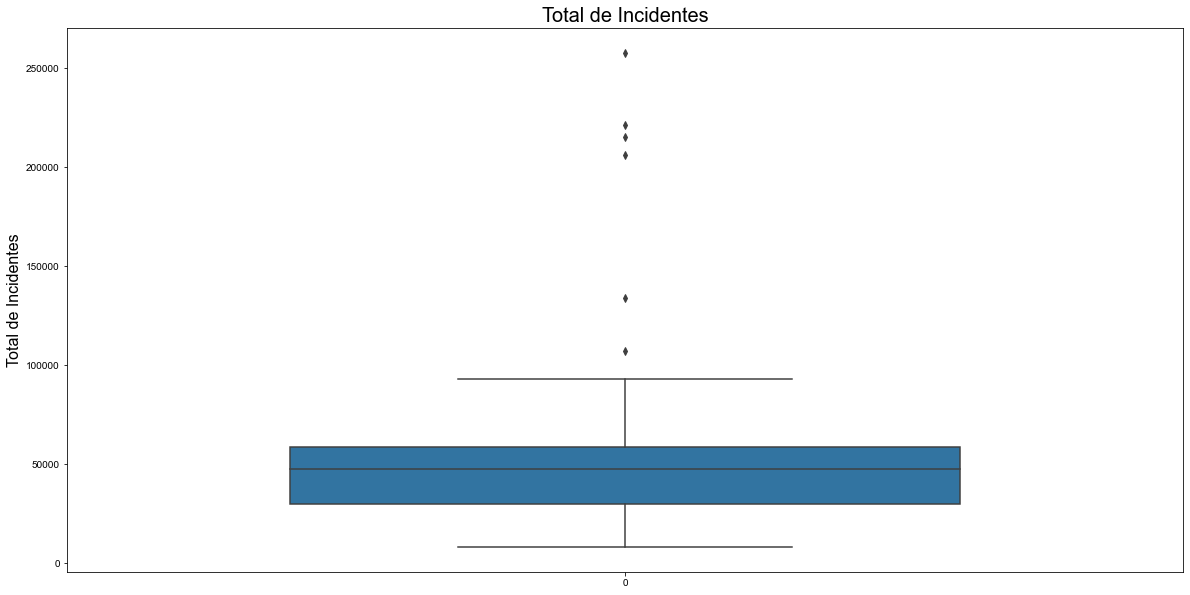

In [9]:
# Plotando o Boxplot

ax = sns.boxplot(data = dados['Total'], orient='v', width=0.6)

sns.set_palette('Accent')
sns.set_style('darkgrid')

ax.figure.set_size_inches(20, 10)
ax.set_title('Total de Incidentes', fontsize = 20)
ax.set_ylabel('Total de Incidentes', fontsize=16)

ax

<AxesSubplot:title={'center':'Total de Incidentes'}, ylabel='Total de Incidentes'>

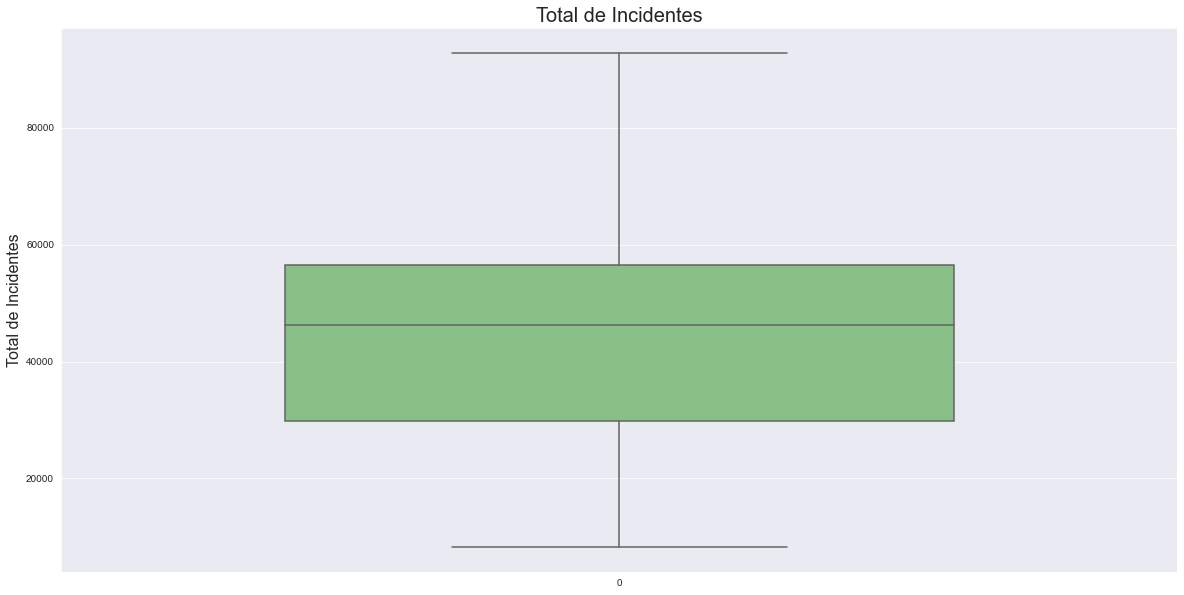

In [10]:
# Boxplot sem Outliers

valor = dados['Total']

Q1 = valor.quantile(.25) # Q1 - 1° Quartil
Q3 = valor.quantile(.75) # Q3 - 3° Quartil
IIQ = Q3 - Q1  # IIQ - Intervalo Inter Quartílico
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_tratados = dados[selecao]

ax = sns.boxplot(data = dados_tratados['Total'], orient='v', width=0.6)

sns.set_palette('Accent')
sns.set_style('darkgrid')

ax.figure.set_size_inches(20, 10)
ax.set_title('Total de Incidentes', fontsize = 20)
ax.set_ylabel('Total de Incidentes', fontsize=16)

ax

Text(0.5, 1.0, 'Total de Incidentes por Categoria')

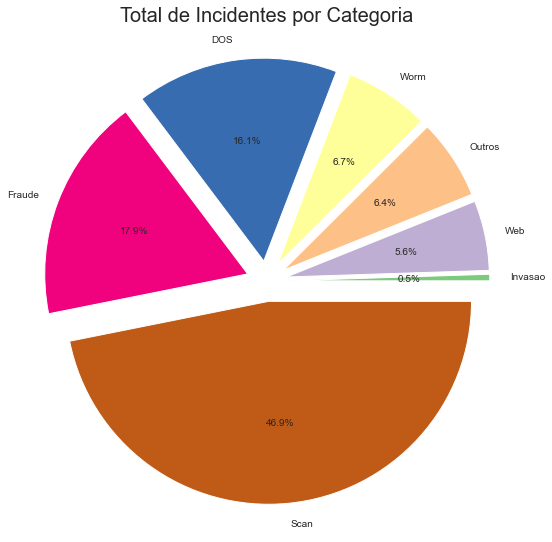

In [11]:
# Gráfico de Pizza com o número de casos por categoria:

area = plt.figure()
g1 = area.add_subplot(1, 2, 1)

grupo1 = dados.groupby('Ano')['Invasao','Web','Outros','Worm', 'DOS', 'Fraude', 'Scan'].sum()
label = grupo1.count().index
valores = grupo1.sum().values
g1.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1, .1, .1))
g1.set_title('Total de Incidentes por Categoria', fontsize = 20)

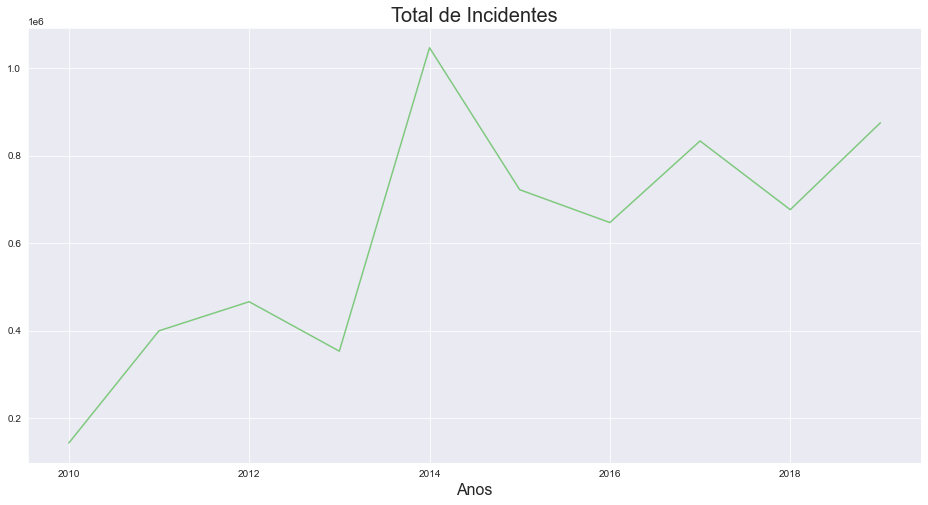

In [12]:
# Total de incidentes por ano:
ts = anos["Total"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total de Incidentes', fontsize = 20)
plt.xlabel('Anos', fontsize = 16)
plt.plot(ts)


# Há uma tendência crescente de casos desde 2010, com um pico em 2014.

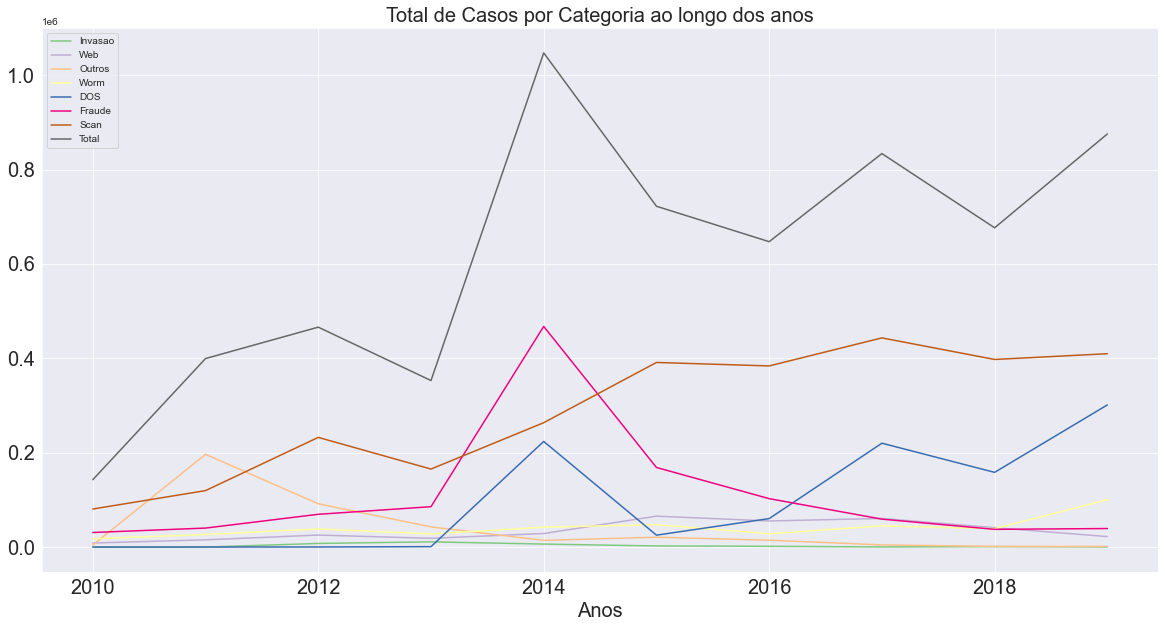

In [13]:
# Total de casos por categoria ao longo dos anos

fig, ax = plt.subplots(figsize=(20, 10))  
anos[['Invasao','Web','Outros','Worm', 'DOS', 'Fraude', 'Scan', 'Total']].sum().plot(fontsize=20, ax = ax)
ax.set_title('Total de Casos por Categoria ao longo dos anos', fontsize=20)
ax.set_xlabel('Anos', fontsize=20)
plt.show()

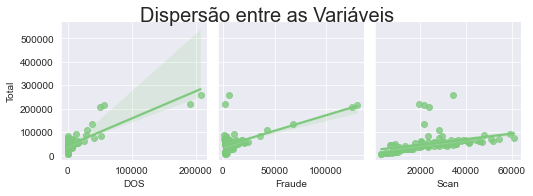

In [14]:
# Gráfico de dispersão Total de Casos X Total de Casos DoS, Fraude e Scan

ax = sns.pairplot(dados, y_vars='Total', x_vars=['DOS', 'Fraude', 'Scan'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# Regressão Linear

## Modelo de teste com 3 variáveis explicativas

In [15]:
y = dados['Total']
x = dados[['DOS', 'Fraude', 'Scan']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2020)

In [16]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)  #Estimando o modelo Linear utilizando os dados de treino
print('R² = {}'.format(modelo.score(x_train, y_train).round(2)))
y_previsto = modelo.predict(x_test)
print('R² = %s' %metrics.r2_score(y_test, y_previsto).round(2))

# O Coeficiente de determinação (R²) é uma medida resumida que diz o quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1.

R² = 0.98
R² = 0.92


In [17]:
# Previsões de teste:

DOS = 4191
Fraude = 1744
Scan = 46038

entrada = [[DOS, Fraude, Scan]]

print(f'A previsão é de {(modelo.predict(entrada)[0]).round(2)} Incidentes.')

A previsão é de 61253.84 Incidentes.


In [18]:
# Intercepto do modelo (o número de casos retirando as variáveis explicativas):
modelo.intercept_.round(2)

11680.07

## Avaliando as estatísticas de teste do modelo

In [48]:
X_train_com_constante = sm.add_constant(x_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1416.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           3.36e-69
Time:                        09:32:57   Log-Likelihood:                -848.22
No. Observations:                  84   AIC:                             1704.
Df Residuals:                      80   BIC:                             1714.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.168e+04   1419.456      8.229      0.0

### Teste de significância conjunta dos parâmetros

   #### Prob (F-statistic)  < 0.05 (OK)

### Teste de significância individual dos parâmetros

   #### P > | t | < 0.05 (OK)

## Interpretação dos Coeficientes Estimados

In [35]:
modelo.intercept_ 
modelo.coef_
x.columns
index = ['Intercepto','DOS', 'Fraude', 'Scan']
pd.DataFrame(data= np.append(modelo.intercept_, modelo.coef_), index = index, columns =['Parâmetros'])

,Parâmetros
Intercepto,11680.068144
DOS,0.986633
Fraude,0.972994
Scan,0.950126


<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_1=X_2=X_3=0$) o efeito médio no número total de casos seria de <b>11680.068</b>

<b>DOS</b> → Mantendo-se o valor de $X_2$ e $X_3$ (Fraude e Scan) constantes, um acréscimo de 1% no número de casos DOS gera, em média, um acréscimo de <b>0.986633%</b> no número Total de casos.
</p>

<b>Fraude</b> → Mantendo-se o valor de $X_1$ e $X_3$ (DOS e Scan) constantes, um acréscimo de 1% no número de casos Fraude gera, em média, um acréscimo de <b>0.972994%</b> no número Total de casos.
</p>

<b>Scan</b> → Mantendo-se o valor de $X_1$ e $X_2$ (DOS e Fraude) constantes, um acréscimo de 1% no número de casos Scan gera, em média, um acréscimo de <b>0.950126%</b> no número Total de casos.
</p>

## Gráfico de dispersão entre valor estimado e valor real

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Total de casos - Previsão', ylabel='Total de casos - Real'>

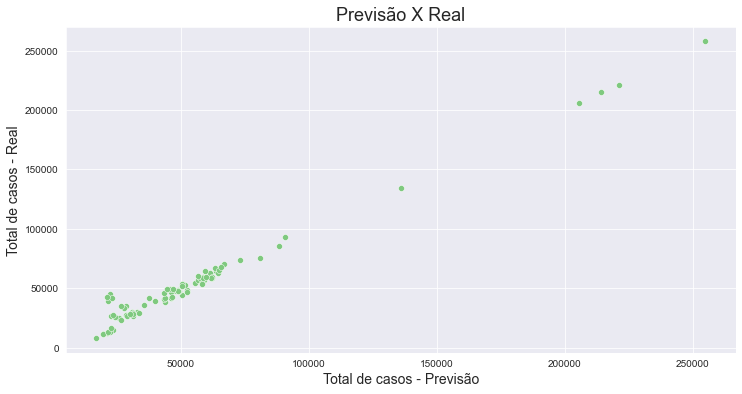

In [41]:
y_previsto_train = modelo.predict(x_train)
ax = sns.scatterplot(x = y_previsto_train, y =  y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Total de casos - Previsão', fontsize=14)
ax.set_ylabel('Total de casos - Real', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Total de casos', ylabel='Density'>

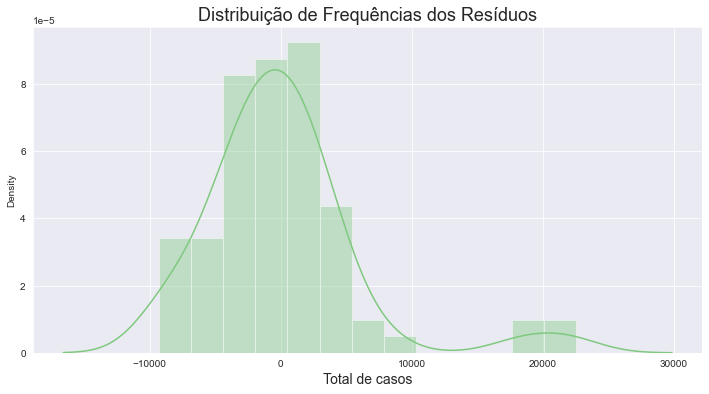

In [49]:
residuo = y_train - y_previsto_train
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Total de casos', fontsize=14)
ax